### **Name: Mhar Andrei Macapallag**
### **C&Y: BSCS 2B**
### **CSEL-302 | Intelligence Systems**
### **Due Date: 20/02/2024 | 11:59 AM**
### **Module 0: Working with Data	Week No. 	4**


---


Activity: Exploratory Data Analysis of Product Data

Objective:
In this activity, you will perform exploratory data analysis (EDA) on a product dataset to gain insights into the categories, products, costs, and quantities.

Dataset:
Name: Retail store computer hardware inventory
Link: https://www.kaggle.com/datasets/ivanchvez/hardwarestore


In [ ]:
#@title Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title Task 1: Data Loading
df = pd.read_csv('hardwareStore.csv')

<Figure size 1200x600 with 0 Axes>

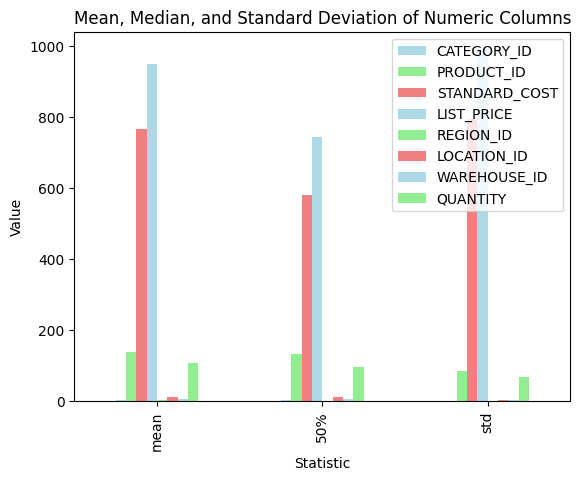

Mean of Standard Cost: 765.52
Median of Standard Cost: 582.02
Standard Deviation of Standard Cost: 794.25

Mean of List Price: 950.99
Median of List Price: 744.98
Standard Deviation of List Price: 991.07


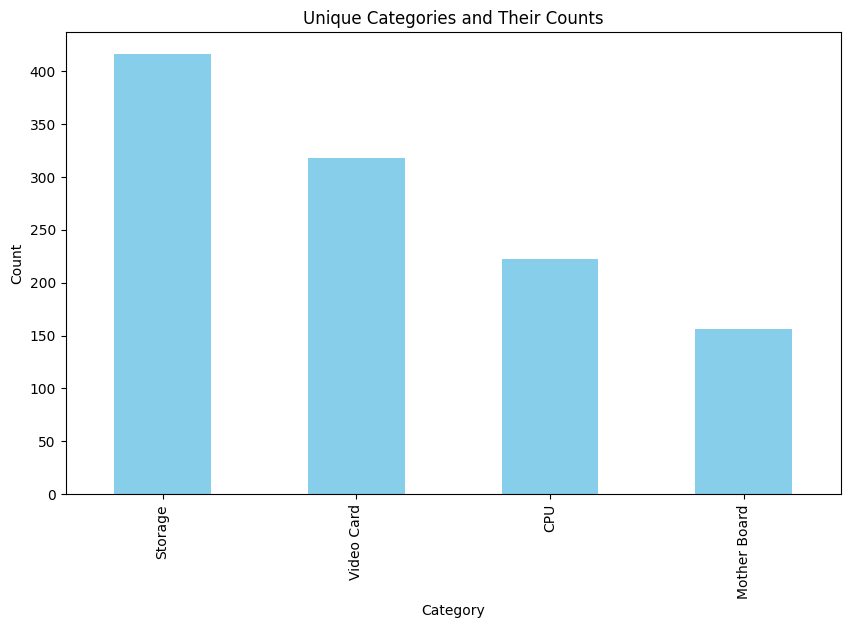

In [ ]:
#@title Task 2: Initial Data Analysis
numeric_stats = df.describe()

standard_deviation = df[['STANDARD_COST', 'LIST_PRICE']].std()

plt.figure(figsize=(12, 6))
numeric_stats.loc[['mean', '50%', 'std']].plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Mean, Median, and Standard Deviation of Numeric Columns')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

print("Mean of Standard Cost: {:.2f}".format(numeric_stats.loc['mean', 'STANDARD_COST']))
print("Median of Standard Cost: {:.2f}".format(numeric_stats.loc['50%', 'STANDARD_COST']))
print("Standard Deviation of Standard Cost: {:.2f}".format(standard_deviation['STANDARD_COST']))

print("\nMean of List Price: {:.2f}".format(numeric_stats.loc['mean', 'LIST_PRICE']))
print("Median of List Price: {:.2f}".format(numeric_stats.loc['50%', 'LIST_PRICE']))
print("Standard Deviation of List Price: {:.2f}".format(standard_deviation['LIST_PRICE']))

unique_categories = df['CATEGORY_NAME'].value_counts()

plt.figure(figsize=(10, 6))
unique_categories.plot(kind='bar', color='skyblue')
plt.title('Unique Categories and Their Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

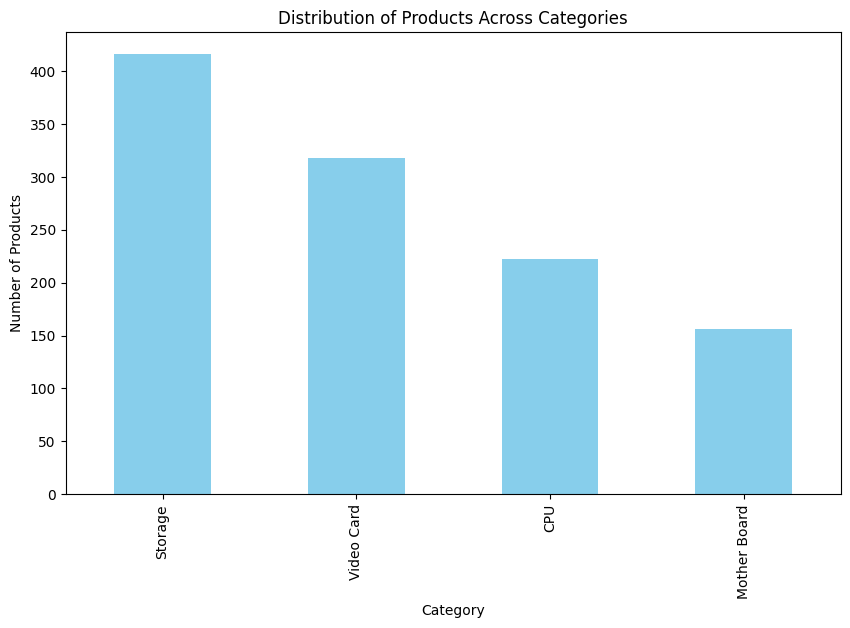

In [ ]:
#@title Task 3: Category Analysis
plt.figure(figsize=(10, 6))
df['CATEGORY_NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

highest_category = unique_categories.idxmax()
highest_category_count = unique_categories.max()

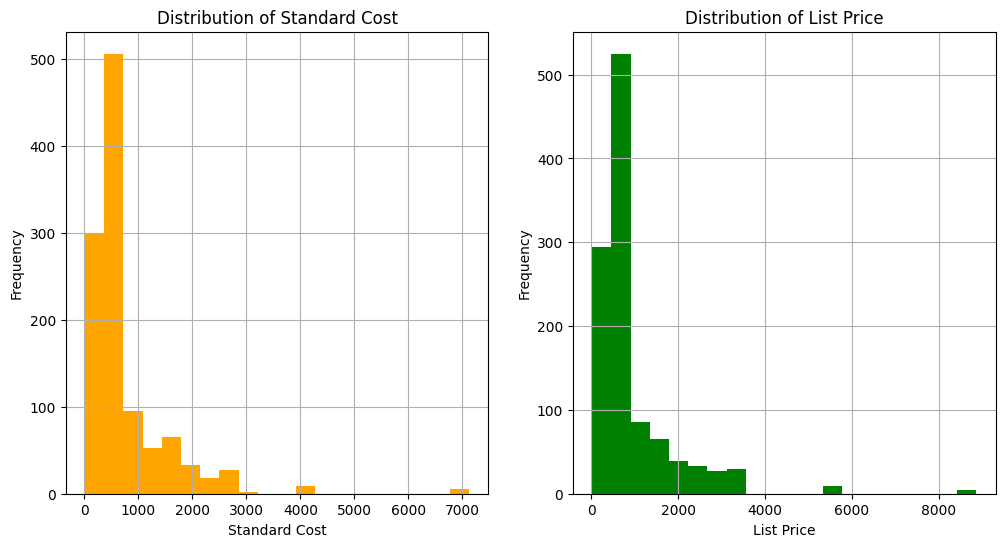


Cost and Price Analysis Results:

Average Standard Cost: 765.52
Average List Price: 950.99

Product with the Highest Standard Cost:
Intel SSDPECME040T401

Product with the Highest List Price:
Intel SSDPECME040T401


In [ ]:
#@title Task 4: Cost and Price Analysis
average_standard_cost = df['STANDARD_COST'].mean()
average_list_price = df['LIST_PRICE'].mean()

# Visualize the distribution of Standard Cost and List Price using histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['STANDARD_COST'].hist(color='orange', bins=20)
plt.title('Distribution of Standard Cost')
plt.xlabel('Standard Cost')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['LIST_PRICE'].hist(color='green', bins=20)
plt.title('Distribution of List Price')
plt.xlabel('List Price')
plt.ylabel('Frequency')

plt.show()

# Identify the product with the highest standard cost and the one with the highest list price
highest_standard_cost_product = df.loc[df['STANDARD_COST'].idxmax(), 'PRODUCT_NAME']
highest_list_price_product = df.loc[df['LIST_PRICE'].idxmax(), 'PRODUCT_NAME']

# Print the details of the products with the highest standard cost and list price
print("\nCost and Price Analysis Results:")
print("\nAverage Standard Cost: {:.2f}".format(average_standard_cost))
print("Average List Price: {:.2f}".format(average_list_price))

print("\nProduct with the Highest Standard Cost:")
print(highest_standard_cost_product)
print("\nProduct with the Highest List Price:")
print(highest_list_price_product)

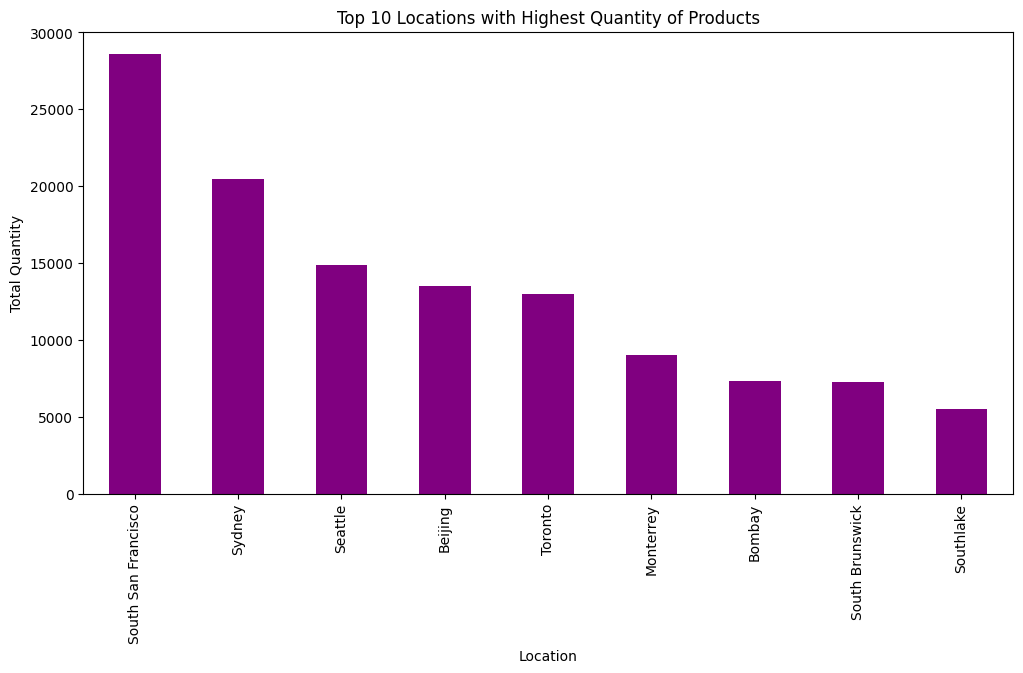

In [ ]:
#@title Task 5: Location Analysis
top_locations = df.groupby('CITY')['QUANTITY'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='purple')
plt.title('Top 10 Locations with Highest Quantity of Products')
plt.xlabel('Location')
plt.ylabel('Total Quantity')
plt.show()

highest_quantity_location = top_locations.idxmax()

In [ ]:
#@title Task 6: Insights and Reporting

basic_stats_summary = """
**Basic Statistics:**
- Mean Standard Cost: {:.2f}
- Median Standard Cost: {:.2f}
- Standard Deviation of Standard Cost: {:.2f}

- Mean List Price: {:.2f}
- Median List Price: {:.2f}
- Standard Deviation of List Price: {:.2f}

- Unique Categories: {}
""".format(numeric_stats.loc['mean', 'STANDARD_COST'],
           numeric_stats.loc['50%', 'STANDARD_COST'],
           standard_deviation['STANDARD_COST'],
           numeric_stats.loc['mean', 'LIST_PRICE'],
           numeric_stats.loc['50%', 'LIST_PRICE'],
           standard_deviation['LIST_PRICE'],
           unique_categories)

category_analysis_summary = """
**Category Analysis:**
- Category with Highest Number of Products: {}
""".format(highest_category)

cost_price_analysis_summary = """
**Cost and Price Analysis:**
- Average Standard Cost: {:.2f}
- Average List Price: {:.2f}
- Product with Highest Standard Cost:
  - Product Name: {}
  - Standard Cost: {:.2f}
- Product with Highest List Price:
  - Product Name: {}
  - List Price: {:.2f}
""".format(average_standard_cost, average_list_price,
           highest_standard_cost_product,
           float(df.loc[df['PRODUCT_NAME'] == highest_standard_cost_product, 'STANDARD_COST'].values[0]),
           highest_list_price_product,
           float(df.loc[df['PRODUCT_NAME'] == highest_list_price_product, 'LIST_PRICE'].values[0]))

location_analysis_summary = """
**Location Analysis:**
- Location with Highest Quantity of Products: {}
""".format(highest_quantity_location)

full_summary = """
Mhar Andrei C. Macapallag
BSCS - 2B
CSEL 302 | Intelligence Systems
Mr. Bernardino

**Summary of Findings:**

{} {} {} {}

**Additional Insights:**
- The distribution of standard cost and list price shows variations, with some products having significantly higher costs and prices.
- The highest quantity of products is concentrated in the location of {}.

""".format(basic_stats_summary, category_analysis_summary,
           cost_price_analysis_summary, location_analysis_summary,
           highest_quantity_location)

print(full_summary)


Mhar Andrei C. Macapallag
BSCS - 2B
CSEL 302 | Intelligence Systems
Mr. Bernardino

**Summary of Findings:**


**Basic Statistics:**
- Mean Standard Cost: 765.52
- Median Standard Cost: 582.02
- Standard Deviation of Standard Cost: 794.25

- Mean List Price: 950.99
- Median List Price: 744.98
- Standard Deviation of List Price: 991.07

- Unique Categories: Storage         416
Video Card      318
CPU             222
Mother Board    156
Name: CATEGORY_NAME, dtype: int64
 
**Category Analysis:**
- Category with Highest Number of Products: Storage
 
**Cost and Price Analysis:**
- Average Standard Cost: 765.52
- Average List Price: 950.99
- Product with Highest Standard Cost:
  - Product Name: Intel SSDPECME040T401
  - Standard Cost: 7123.66
- Product with Highest List Price:
  - Product Name: Intel SSDPECME040T401
  - List Price: 8867.99
 
**Location Analysis:**
- Location with Highest Quantity of Products: South San Francisco


**Additional Insights:**
- The distribution of standard cost

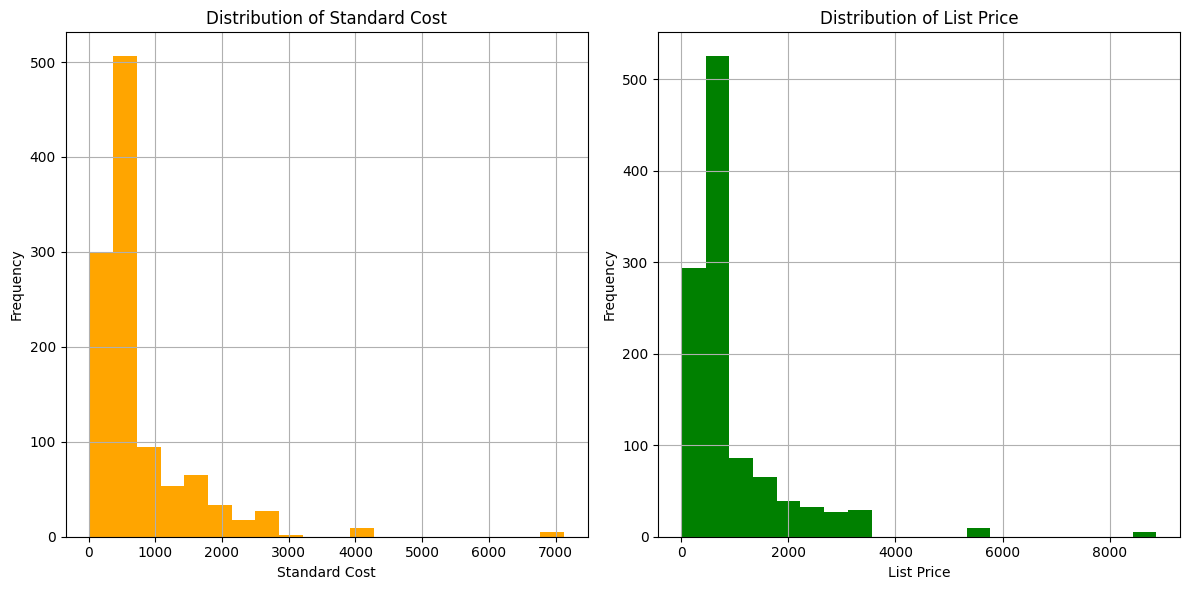

In [ ]:
#@title Save the report to png and text file
with open('Mhar Andrei C. Macapallag - Summary.txt', 'w') as file:
    file.write(full_summary)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['STANDARD_COST'].hist(color='orange', bins=20)
plt.title('Distribution of Standard Cost')
plt.xlabel('Standard Cost')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['LIST_PRICE'].hist(color='green', bins=20)
plt.title('Distribution of List Price')
plt.xlabel('List Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('histograms.png')
plt.show()